In [ ]:
!pip install pandas numpy scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/lutzhamel/fake-news/master/data/fake_or_real_news.csv"
df = pd.read_csv(url)
df.head()


,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
# Step 1: Install Dependencies
!pip install pandas scikit-learn

# Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Load Dataset (GitHub working link)
url = "https://raw.githubusercontent.com/lutzhamel/fake-news/master/data/fake_or_real_news.csv"
df = pd.read_csv(url)
print("Dataset shape:", df.shape)
print(df.head())

# Step 4: Split Data
X = df['text']       # News content
y = df['label']      # Fake or Real

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_test_vec)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Test on New Input
sample_news = [
    "Breaking: Scientists have discovered water on Mars!",
    "Donald Trump wins the lottery and buys Google!"
]
sample_vec = vectorizer.transform(sample_news)
print("\nSample Predictions:")
for text, pred in zip(sample_news, model.predict(sample_vec)):
    print(f"News: {text}\nPrediction: {pred}\n")


Dataset shape: (6335, 4)
      id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
✅ Accuracy: 0.9155485398579322

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       628
        REAL       0.93      0.90      0.91       639

    accura

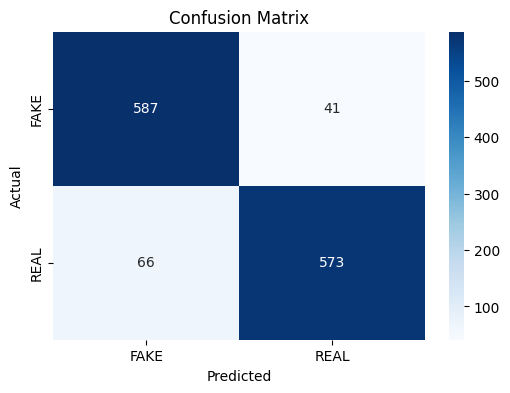

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["FAKE","REAL"], yticklabels=["FAKE","REAL"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
import pickle

# Save model
with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model & Vectorizer saved!")


✅ Model & Vectorizer saved!


In [5]:
with open("fake_news_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Test
sample = ["This is a breaking news about AI revolution."]
print("Prediction:", loaded_model.predict(loaded_vectorizer.transform(sample)))


Prediction: ['FAKE']


In [ ]:
news_input = input("Enter a news article to check if it's Fake or Real:\n")
news_vec = vectorizer.transform([news_input])
print("Prediction:", model.predict(news_vec)[0])
